**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../data/working_data.csv')

**Histogram**

In [20]:
quart1 = np.percentile(df['Diff_from_Spread'], 25)
quart3 = np.percentile(df['Diff_from_Spread'], 75)

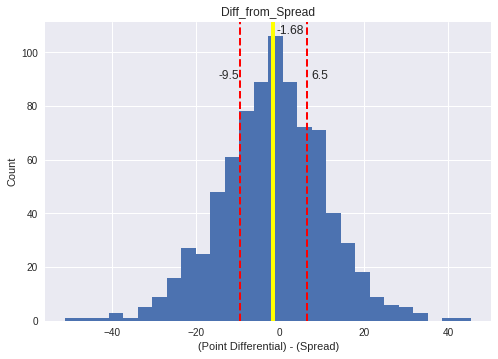

In [49]:
df.hist(column='Diff_from_Spread', bins=int(np.sqrt(len(df['Diff_from_Spread']))))
plt.axvline(quart1, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(quart3, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(np.mean(df['Diff_from_Spread']), color = 'yellow', 
            linestyle = 'solid', linewidth = 4)
plt.xlabel('(Point Differential) - (Spread)')
plt.ylabel('Count')
plt.text(quart1-5, 90, quart1)
plt.text(quart3+1, 90, quart3)
plt.text(np.mean(df.Diff_from_Spread)+1, 107, round(np.mean(df.Diff_from_Spread), 2))

**Heatmap**

In [52]:
df_preds = df.iloc[:,15:]

In [53]:
df_preds_corr = df_preds.corr()

In [56]:
mask = np.zeros_like(df_preds_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

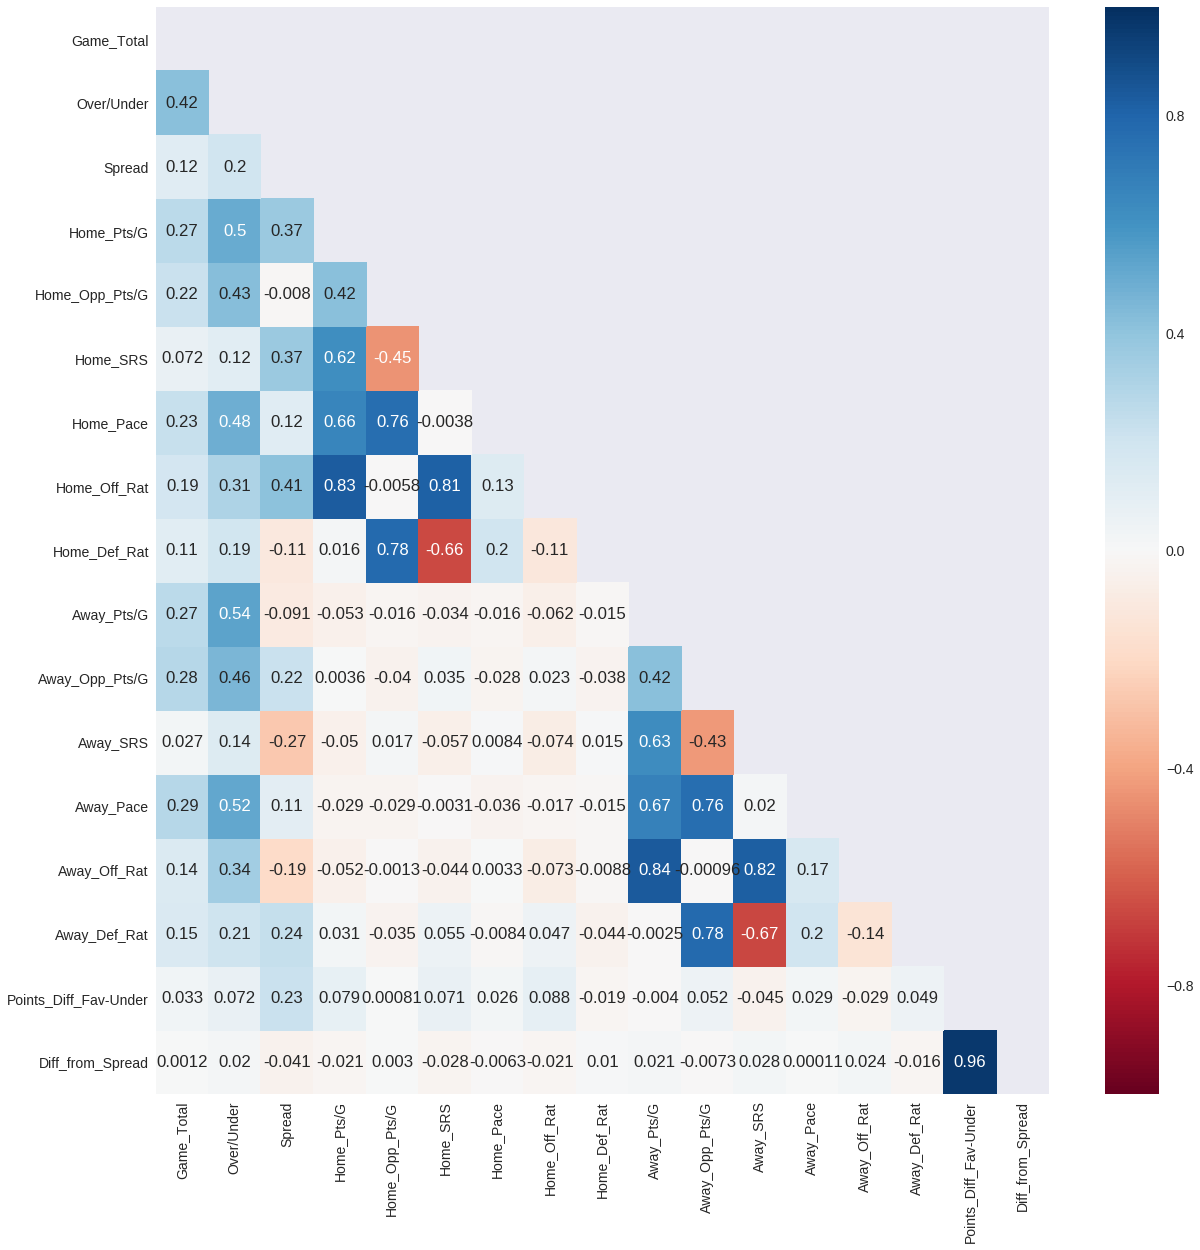

In [57]:
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)
sns.heatmap(df_preds_corr, mask=mask, cmap='RdBu', annot=True)